In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Appliquer le thème Seaborn
sns.set_theme(style='darkgrid', palette='deep')

In [3]:
# Fonction pour faire un prétraitement des données
def data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='val'):
    # Remplacer les valeurs infinies par NaN
    data[value] = data[value].replace([np.inf, -np.inf], np.nan)
    data['non_viable'] = np.where(np.isnan(data['val']), 1, 0)
    # Remplacer les valeurs NaN par la moyenne
    data[value] = data[value].fillna(data[value].mean())
    valeurs = data.groupby(groupby).agg(
        mean_val=(value, 'mean'),
        std_val=(value, 'std'),
        max_val=(value, 'max'),
        min_val=(value, 'min'),
        non_viable_amount=('non_viable', 'sum')
    ).reset_index()
    
    return valeurs

In [4]:
# Fonction de plot pour les stats des itérations
def draw_iterations_value_stats(data, **kwargs):
    # Utilisation de kwargs.get pour des valeurs par défaut
    row = kwargs.get('row', 'problem_size')
    col = kwargs.get('col', 'problem')
    hue = kwargs.get('hue', None)
    sharex = kwargs.get('sharex', 'row')
    sharey = kwargs.get('sharey', 'row')
    height = kwargs.get('height', 3)
    aspect = kwargs.get('aspect', 2)
    title = kwargs.get('title', '')

    # Création du FacetGrid
    fc = sns.FacetGrid(data, row=row, col=col, hue=hue, margin_titles=True, sharex=sharex, sharey=sharey, height=height, aspect=aspect)
    palette = sns.color_palette()
    
    # Tracer les lignes
    fc.map_dataframe(sns.lineplot, 'iter', 'mean_val', color=palette[0], label='Valeur Moyenne')
    fc.map_dataframe(sns.lineplot, 'iter', 'max_val', color=palette[1], label='Valeur Max')
    fc.map_dataframe(sns.lineplot, 'iter', 'min_val', color=palette[2], label='Valeur Min')
    
    # Fonction pour ajouter les bandes d'erreur
    def add_error_bands(data, **kwargs):
        plt.fill_between(data['iter'], data['mean_val'] - data['std_val'], data['mean_val'] + data['std_val'], alpha=0.2, color=palette[0], label='Écart-type')
    
    fc.map_dataframe(add_error_bands)
    
    # Ajouter la légende
    fc.add_legend(title="Légende")
    fc.figure.suptitle(title)
    # Ajouter les labels aux axes
    fc.set_axis_labels('Itération', 'Valeur')
    
    # Ajustement de la mise en page
    fc.tight_layout()
    return fc

def draw_iterations_non_viable_amount(data, **kwargs):
    # Utilisation de kwargs.get pour des valeurs par défaut
    row = kwargs.get('row', 'problem_size')
    col = kwargs.get('col', 'problem')
    hue = kwargs.get('hue', None)
    sharex = kwargs.get('sharex', 'row')
    sharey = kwargs.get('sharey', 'row')
    height = kwargs.get('height', 3)
    aspect = kwargs.get('aspect', 2)
    title = kwargs.get('title', '')

    # Création du FacetGrid
    fc = sns.FacetGrid(data, row=row, col=col, hue=hue, margin_titles=True, sharex=sharex, sharey=sharey, height=height, aspect=aspect)
    palette = sns.color_palette()
    fc.map_dataframe(sns.lineplot, 'iter', 'non_viable_amount', color=palette[0], label='Nombre de solutions non viables')

    # L'axe y commence à 0
    fc.set(ylim=(0, None))
    
    # Ajouter la légende
    fc.add_legend(title="Légende")
    fc.figure.suptitle(title)
    # Ajouter les labels aux axes
    fc.set_axis_labels('Itération', 'Nombre de solutions non viables')
    
    # Ajustement de la mise en page
    fc.tight_layout()
    return fc

def draw_algo_comparison(data, **kwargs):
    # Utilisation de kwargs.get pour des valeurs par défaut
    row = kwargs.get('row', 'problem_size')
    col = kwargs.get('col', 'problem')
    x = kwargs.get('x', 'algo')
    y = kwargs.get('y', 'mean_val')
    hue = kwargs.get('hue', 'algo')
    sharey = kwargs.get('sharey', 'row')
    sharex = kwargs.get('sharex', 'row')
    showfliers = kwargs.get('showfliers', False)
    dodge = kwargs.get('dodge', False)
    title = kwargs.get('title', 'Comparaison des algorithmes')

    # Création du FacetGrid
    fc = sns.FacetGrid(data, row=row, col=col, margin_titles=True, sharey=sharey, sharex=sharex)
    
    # Tracer les boîtes à moustaches
    fc.map(sns.boxplot, x, y, hue, showfliers=showfliers, dodge=dodge)
    
    # Ajouter la légende
    fc.add_legend(title="Légende")
    fc.figure.suptitle(title)
    
    # Ajouter les labels aux axes
    fc.set_axis_labels("", "Valeur")
    
    # Ajustement de la mise en page
    fc.tight_layout()
    
    return fc


In [5]:
stats = {}

#  1. Une stratégie d'évolution inutile

## Test RandomES sur des petites instances des fonctions de test

### Execution

In [6]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [7]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

ForkProcess-2 is working on rosenbrockForkProcess-4 is working on tabletForkProcess-1 is working on sphereForkProcess-3 is working on sharpridge



Running RandomES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]Running RandomES on Tablet for 30 runs [max eval 5000 or max iter 5000]

Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running RandomES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]

ForkProcess-14 is working on rosenbrockForkProcess-13 is working on sphereForkProcess-15 is working on sharpridgeForkProcess-16 is working on tablet



Running RandomES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]Running RandomES on Tablet for 30 runs [max eval 5000 or max iter 5000]Running RandomES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]


Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]
ForkProcess-25 is working on sphereForkProcess-26 is working on rosenbrockForkProcess-27 is working on sharp

### Visualisation

In [8]:
algo_analise = 'RandomES'
# stats[algo_analise] = get_stats_from_csv(algo_analise, problems_name, problems_size=['small'])
data = stats[algo_analise]
valeurs = data_preprocessing(data)

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


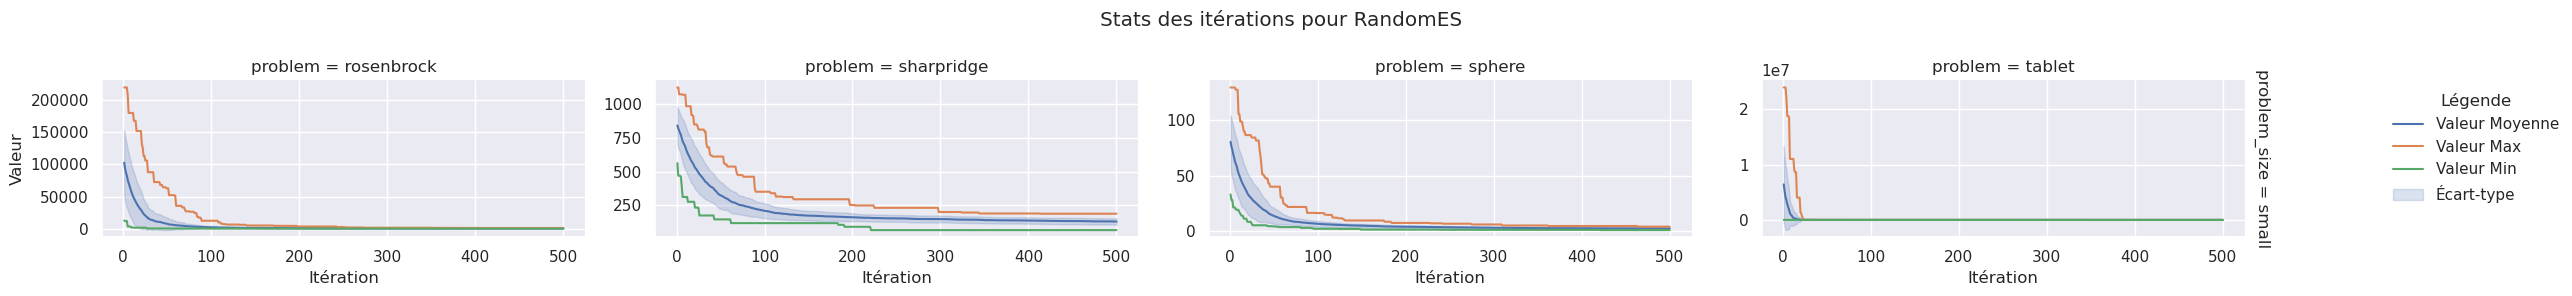

In [9]:
%matplotlib inline
g1 = draw_iterations_value_stats(valeurs, row='problem_size', col='problem', sharex=False, sharey=False, title=f'Stats des itérations pour {algo_analise}')
# g2 = draw_iterations_non_viable_amount(valeurs, row='problem_size', col='problem', sharex=False, sharey=False, title=f'Nombre de valeurs non viables pour {algo_analise}')
plt.show()


# 2. Peu Mieux Faire

## Codage BestES

In [10]:
class BestES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def update_m(self, sample):
        index_meilleur = self._idx.index(0)
        meilleur = sample[index_meilleur]

        if self.better(meilleur, self._solution) :
            self._solution = meilleur

## Test BestES

### Execution

In [ ]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    BestES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

### Visualisation

In [12]:
algo_analise = 'BestES'
# stats[algo_analise] = get_stats_from_csv(algo_analise, problems_name, problems_size=['small'])
data = stats[algo_analise]
valeurs = data_preprocessing(data)

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


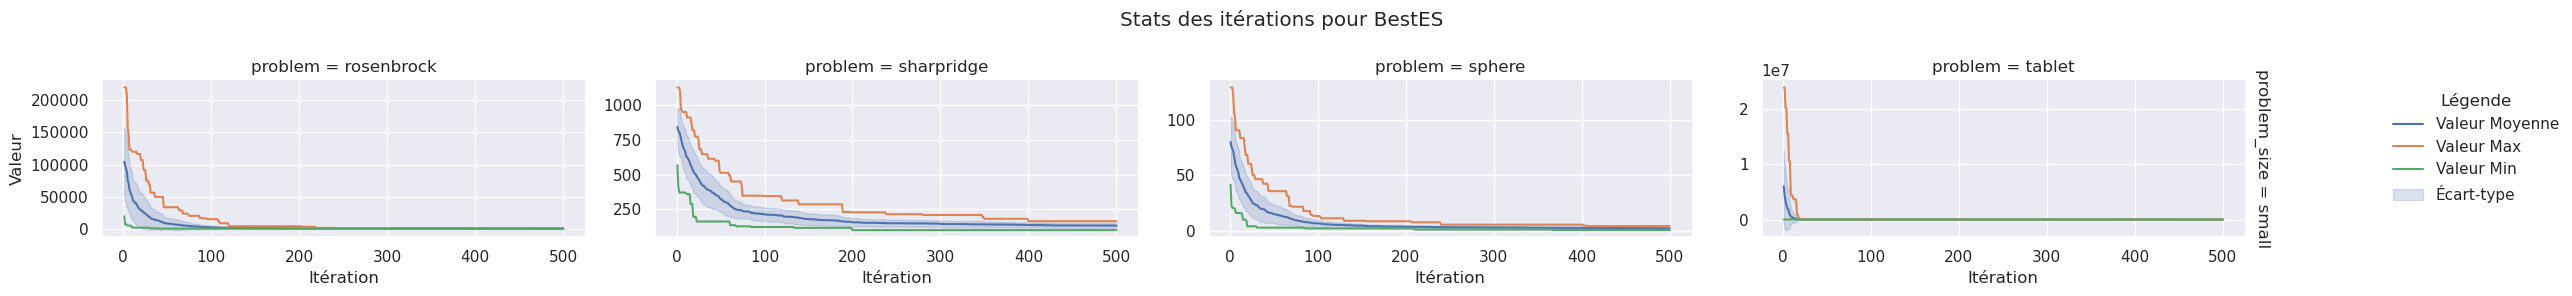

In [13]:
# %matplotlib inline
g1 = draw_iterations_value_stats(valeurs, row='problem_size', col='problem', sharex=False, sharey=False, title=f'Stats des itérations pour {algo_analise}')
# g2 = draw_iterations_non_viable_amount(valeurs, row='problem_size', col='problem', sharex=False, sharey=False, title=f'Nombre de valeurs non viables pour {algo_analise}')
plt.show()

## Comparaison BestES et RandomES

In [14]:
stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small'])
stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small'])

In [15]:
data = pd.concat([stats['RandomES'], stats['BestES']])
valeurs = data_preprocessing(data)

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


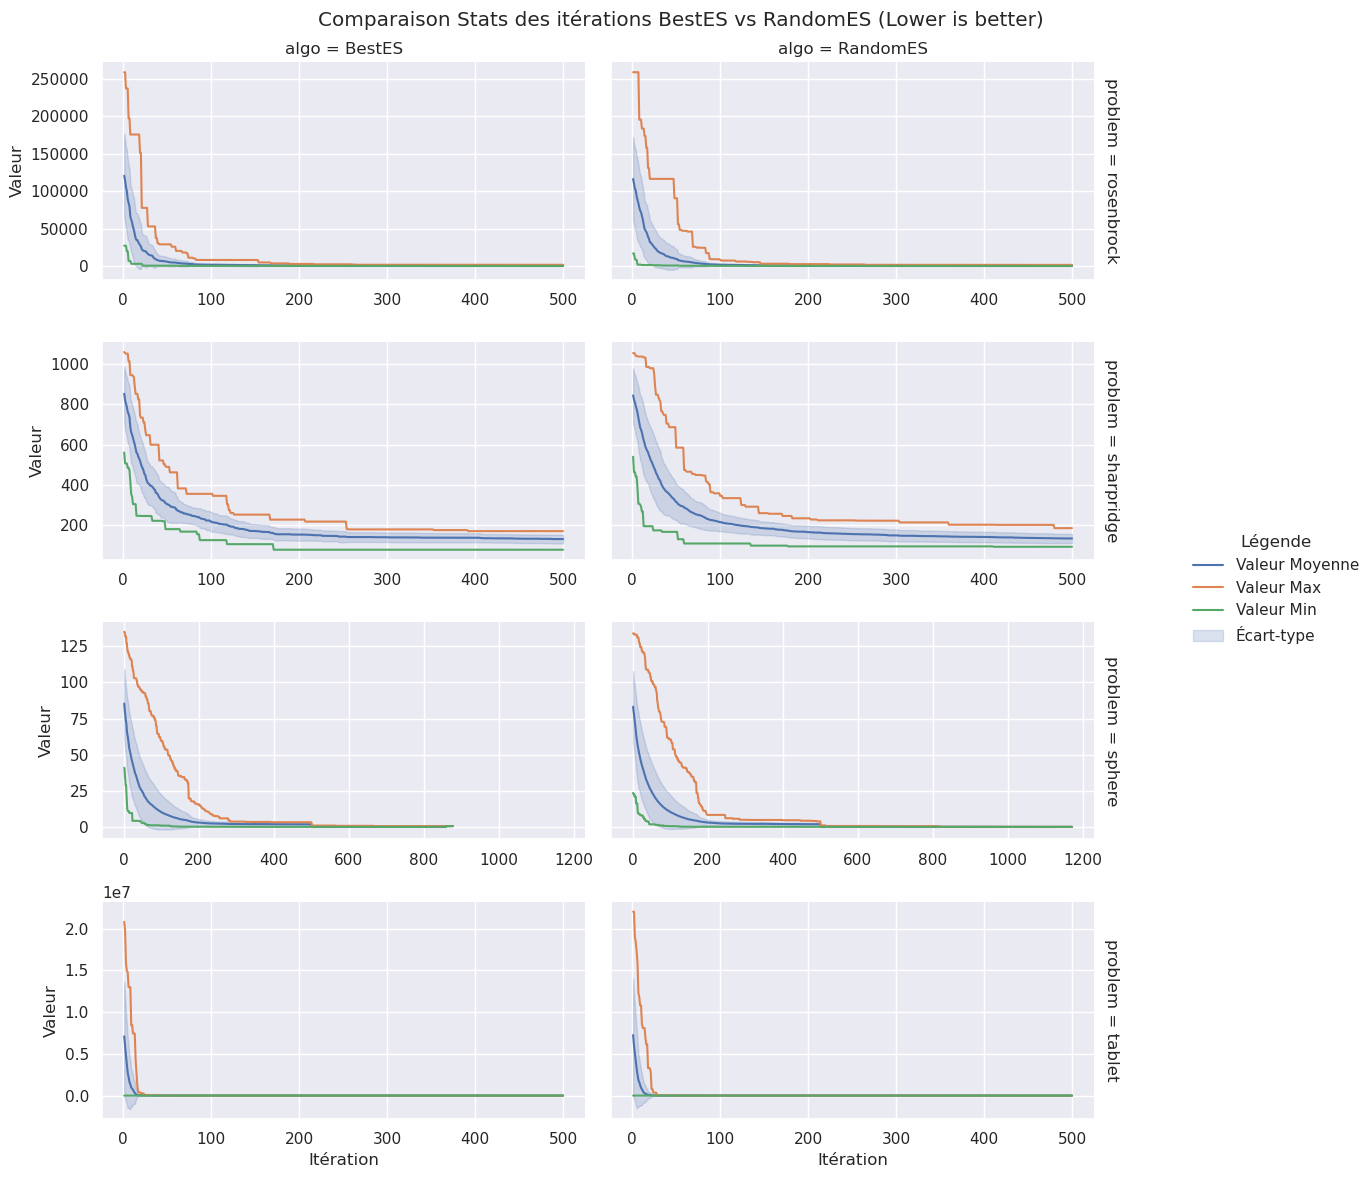

In [16]:
# %matplotlib inline
g1 = draw_iterations_value_stats(valeurs, col='algo', row='problem', sharex='row', sharey='row', title=f'Comparaison Stats des itérations BestES vs RandomES (Lower is better)')
# g2 = draw_iterations_non_viable_amount(valeurs, col='algo', row='problem', sharex='row', sharey='row', title=f'Nombre de valeurs non viables BestES vs RandomES')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


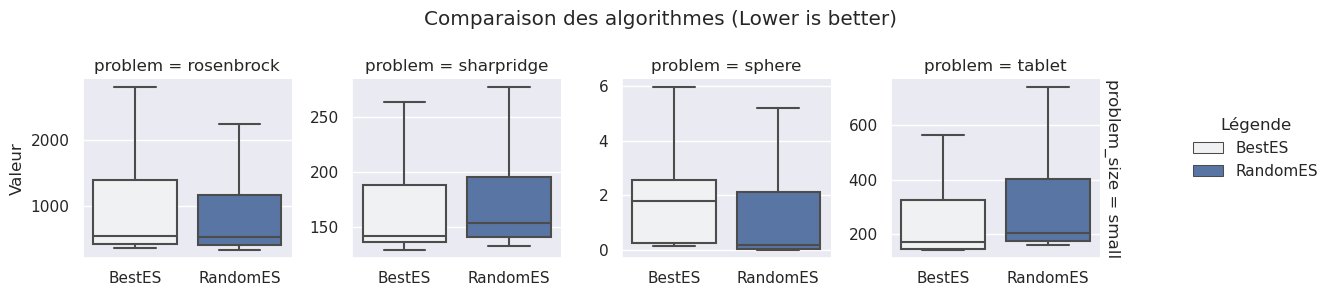

In [17]:
g3 = draw_algo_comparison(valeurs, col='problem', row='problem_size', x='algo', y='mean_val', hue='algo', title='Comparaison des algorithmes (Lower is better)', sharex=False, sharey=False)
plt.show()

On peut voir que BestES converge plus rapidement que RandomES au fil de l'itération mais se retrouve souvent 'coincé' au même optimum local pendant plusieurs itérations, tandis que RandomES à une évolution plus constante. Grâce aux boxplots on peut voir que RandomES a légérement une meilleure performance que BestES sur le problème rosebrock et sphere. Mais pour les autres problèmes de test, BestES est un peu plus performant que RandomES.

# MeanES

## Codage MeanES

In [18]:
class MeanES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._weights = np.array([[1/self._mu] for i in range(self._mu)])

    def update_m(self, sample):
        moyenne = None
        # On calcule la moyenne des mu premiers
        selection = np.array([ind._sol for ind in sample[:self._mu]]) # déjà trié par l'étape précédente
        # On calcule la moyenne pondérée
        weighted_sum = np.sum(self._weights[:len(selection)] * selection, axis=0)
        moyenne = RealSolution(x=weighted_sum)
        self._problem.evaluate(moyenne)
        
        if self.better(moyenne, self._solution) :
            self._solution = moyenne

## Test MeanES

In [19]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    MeanES,
    RandomES,
    BestES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

## Comparaison MeanES et RandomES

In [21]:
# stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small'])
# stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small'])
# stats['MeanES'] = get_stats_from_csv('MeanES', problems_name, problems_size=['small'])

In [22]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES']])
valeurs = data_preprocessing(data)

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


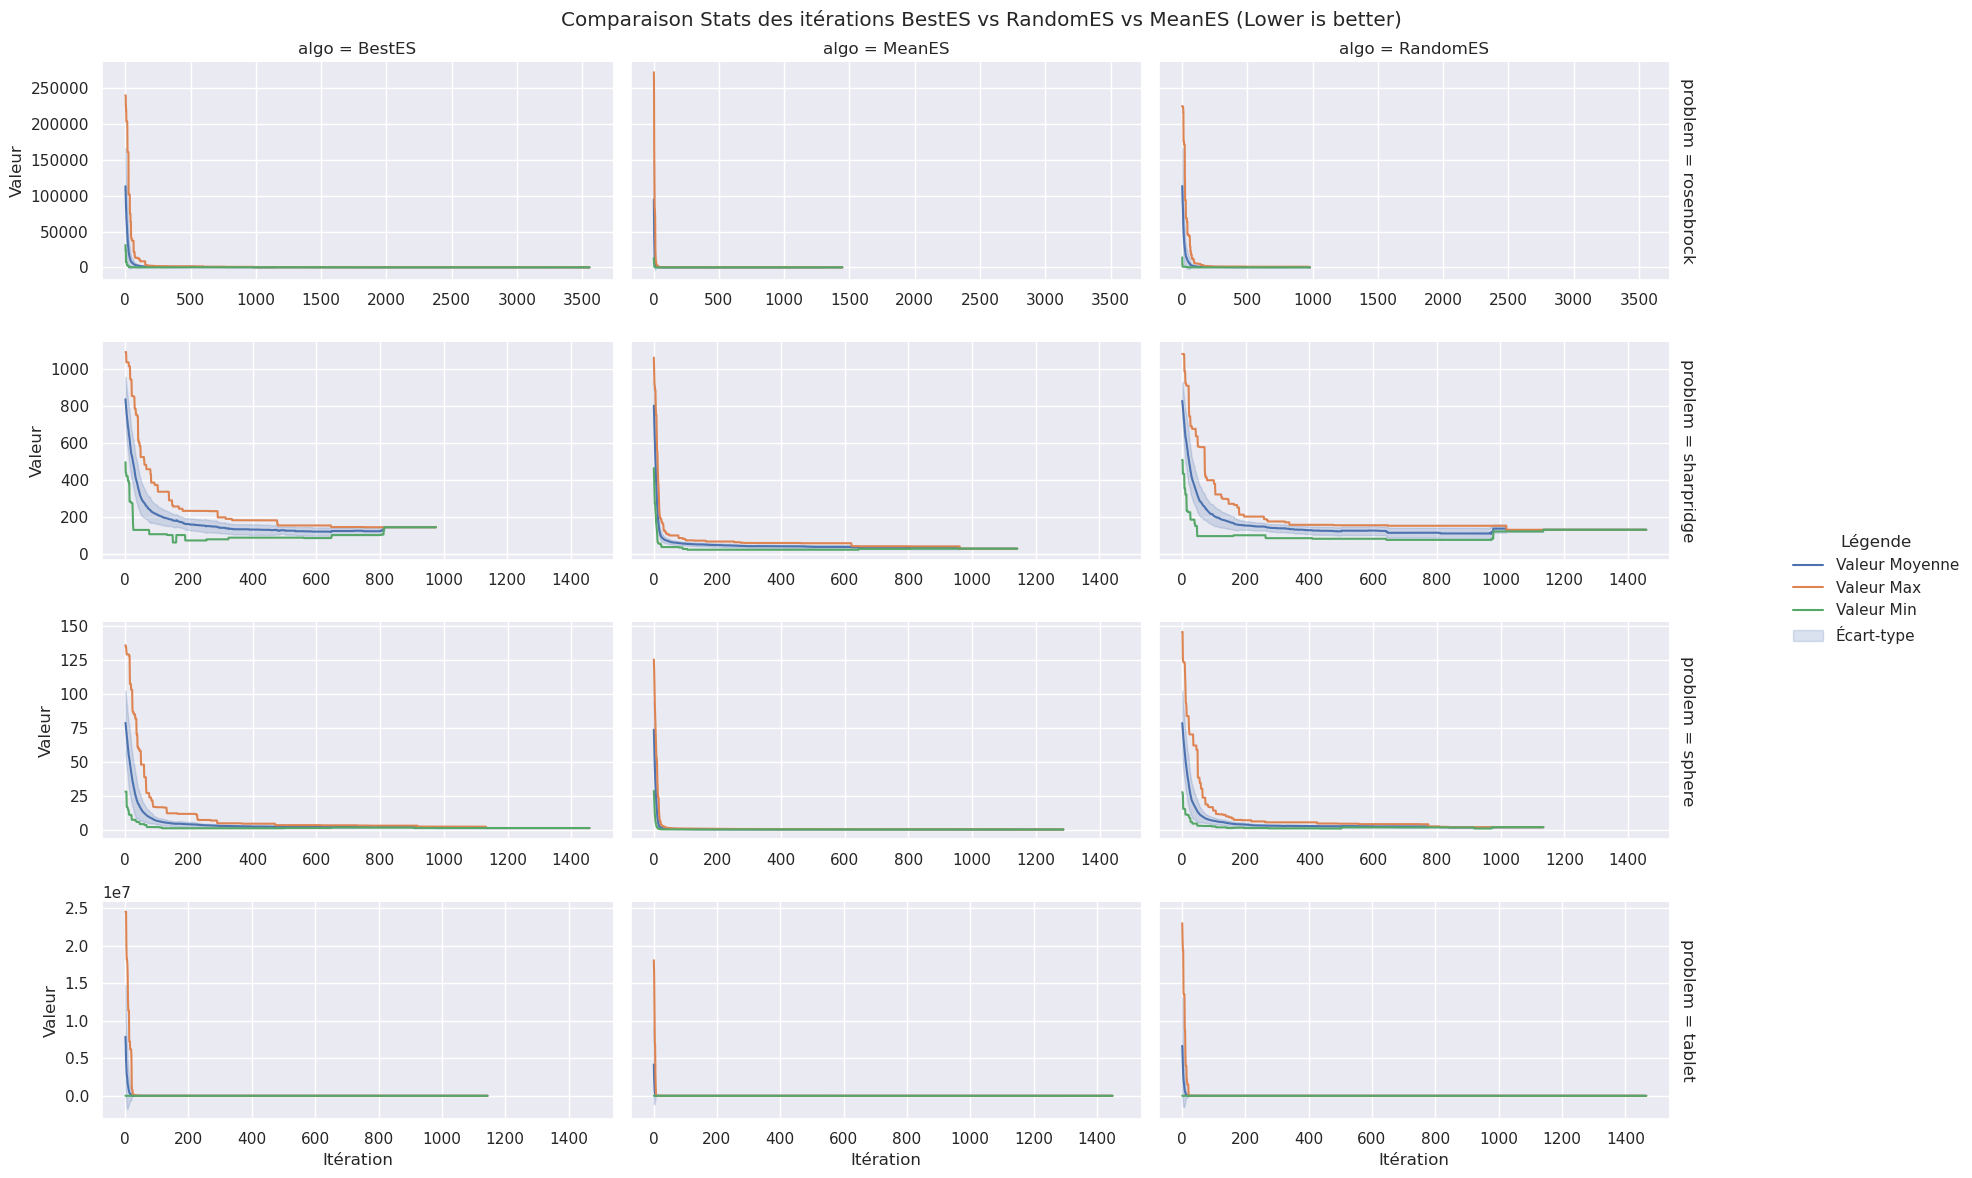

In [23]:
%matplotlib inline
g1 = draw_iterations_value_stats(valeurs, col='algo', row='problem', sharex='row', sharey='row', title=f'Comparaison Stats des itérations BestES vs RandomES vs MeanES (Lower is better)')
# g2 = draw_iterations_non_viable_amount(valeurs, col='algo', row='problem', sharex='row', sharey='row', title=f'Nombre de valeurs non viables BestES vs RandomES vs MeanES')
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


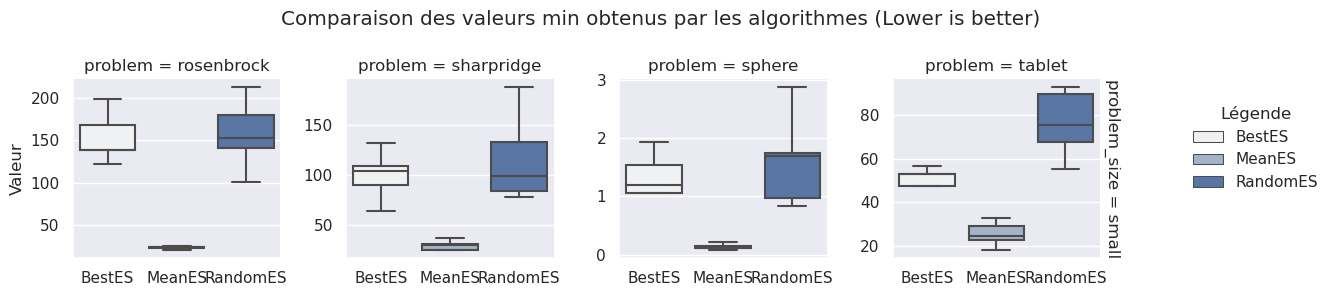

In [24]:
g3 = draw_algo_comparison(valeurs, col='problem', row='problem_size', x='algo', y='min_val', hue='algo', title='Comparaison des valeurs min obtenus par les algorithmes (Lower is better)', sharex=False, sharey=False)

On peut constater que MeanES converge beaucoup plus rapidement que RandomES et BestES, son evolution est plus constante, tout au long des itérations, avec des temps en temps des sauts (exploration) vers des individus moins performants.
Au niveau des boxplots, on peut voir que MeanES a une meilleure performance que RandomES et BestES et en moyenne moins de dispersion (les outliers ne sont pas représentés pour plus de clarté). Parfois MeanES est un peu plus dispersé et avec des moyennes moins performantes d'aprés le boxplot on pourrait croire que MeanES est moins performant que RandomES et BestES, mais en réalité MeanES est plus performant que les deux autres (comme on peut le constater sur le graphe des itérations). Cela est dû au fait que MeanES explore plus que les deux autres algorithmes et peu accepter des solutions moins performantes, ce qui influence la moyenne et la dispersion des résultats.

## Conclusion pourquoi MeanES est meilleur que BestES
Mon hypothèse est que MeanES est meilleur que BestES car MeanES fait une exploration plus constante et plus efficace que BestES, qui lui se retrouve souvent 'coincé' au même optimum local pendant plusieurs itérations. En prenant la moyenne des individus, MeanES peut esperer sortir de cet optimum local en modifiant sa trajectoire, tandis que BestES ne peut pas.

# 3. Avancer par petit pas

## Test sur fontion sphère

In [25]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    # 'rosenbrock',
    # 'sharpridge',
    # 'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES,
    BestES,
    MeanES
]
sig_values = [0.1, 0.2, 0.5, 1, 2, 5, 10]
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 0.5
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=7,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

## Influence de sigma sur les résultats

In [27]:
# stats['RandomES'] = get_stats_from_csv('RandomES', ['sphere'], problems_size=['small'])
# stats['BestES'] = get_stats_from_csv('BestES', ['sphere'], problems_size=['small'])
# stats['MeanES'] = get_stats_from_csv('MeanES', ['sphere'], problems_size=['small'])

In [28]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES']])
valeurs = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'sig', 'iter'])

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


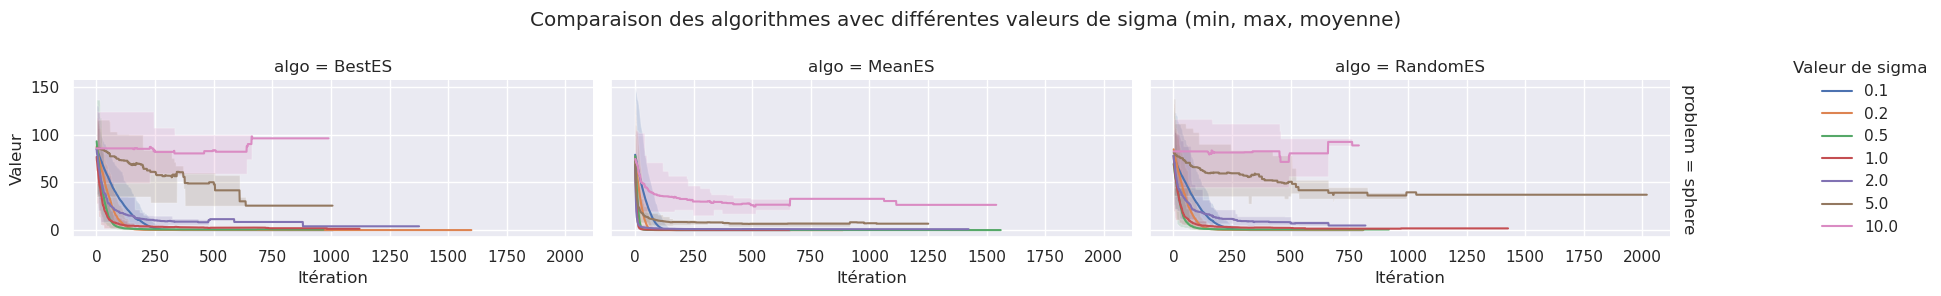

In [29]:
# %matplotlib inline

fc = sns.FacetGrid(valeurs, row='problem', col='algo', hue='sig', margin_titles=True, sharex='row', sharey='row', height=3, aspect=2)

# Tracer les lignes
fc.map_dataframe(sns.lineplot, 'iter', 'mean_val', label='Valeur Moyenne')

# Fonction pour ajouter les bandes d'erreur (min et max)
def add_error_bands(data, **kwargs):
    plt.fill_between(data['iter'], data['min_val'], data['max_val'], alpha=0.2, label='Écart min max')

fc.map_dataframe(add_error_bands)

# Ajouter la légende
fc.add_legend(title="Valeur de sigma")
fc.figure.suptitle('Comparaison des algorithmes avec différentes valeurs de sigma (min, max, moyenne)')
# Ajouter les labels aux axes
fc.set_axis_labels('Itération', 'Valeur')

# Ajustement de la mise en page
fc.tight_layout()

On peut constater que sigma a une influence sur la convergence de l'algorithme. 0.5 semble être la valeur optimale pour sigma. Plus sigma est grand, plus la convergence est rapide mais plus on est souvent 'coincé' au même optimum local pendant plusieurs itérations (exploitation). Au contraire, plus sigma est petit, plus l'évolution est lente mais plus on explore de nouveaux individus (exploration) ce qui peut permettre de sortir d'un optimum local.

# 4. Courir ou rallentir

## Mise à jour update_sigma

In [30]:
def f (self, sample):
    pt = 1/5
    ps = 0
    for x in sample: # On compte le nombre de solution meilleure que la solution courante
        if self.better(x, self._solution):
            ps += 1
    ps /= self._lambda
    self._sigma = self._sigma * np.exp((1/3) * (ps - pt)/(1-pt))

### RandomES

In [31]:
RandomES.update_sigma = f

### BestES

In [32]:
BestES.update_sigma = f

### MeanES

In [33]:
MeanES.update_sigma = f

## Retest des algorithmes

In [34]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    # 'rosenbrock',
    # 'sharpridge',
    # 'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES,
    BestES,
    MeanES
]
sig_values = []
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 1.
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

## Décrire evolution de sigma

In [36]:
# stats['RandomES'] = get_stats_from_csv('RandomES', ['sphere'], problems_size=['small'])
# stats['BestES'] = get_stats_from_csv('BestES', ['sphere'], problems_size=['small'])
# stats['MeanES'] = get_stats_from_csv('MeanES', ['sphere'], problems_size=['small'])

In [37]:
# n = 30
# stats2 = {}
# for nom, d in stats.items():
#     m = d['run'].max()
#     filtered_data = d[(d['run'] >= (m - n)) & (d['run'] <= m)]
#     stats2[nom] = filtered_data

In [38]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES']])
valeurs_sigma = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='sig')
valeurs_val = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='val')

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


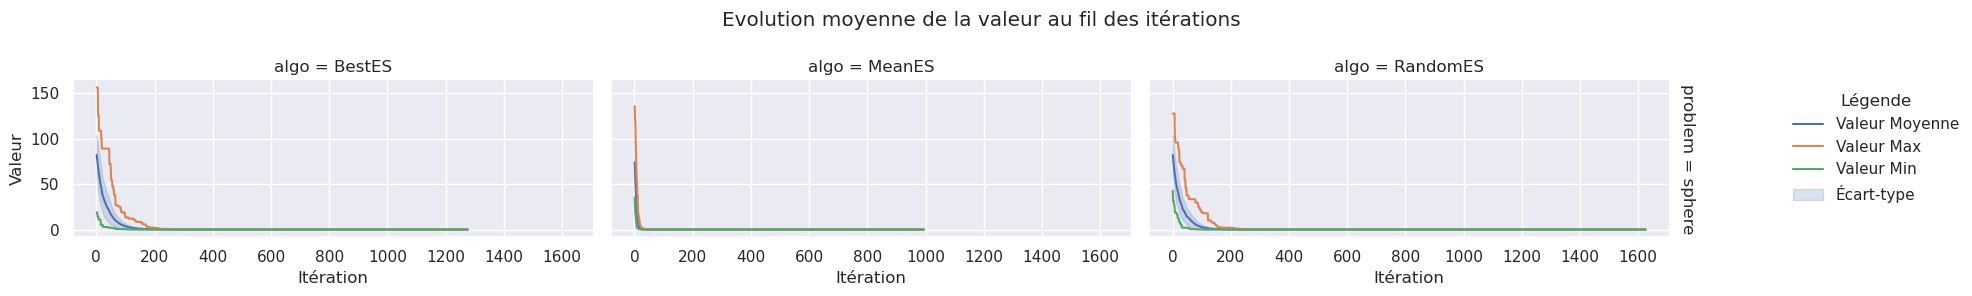

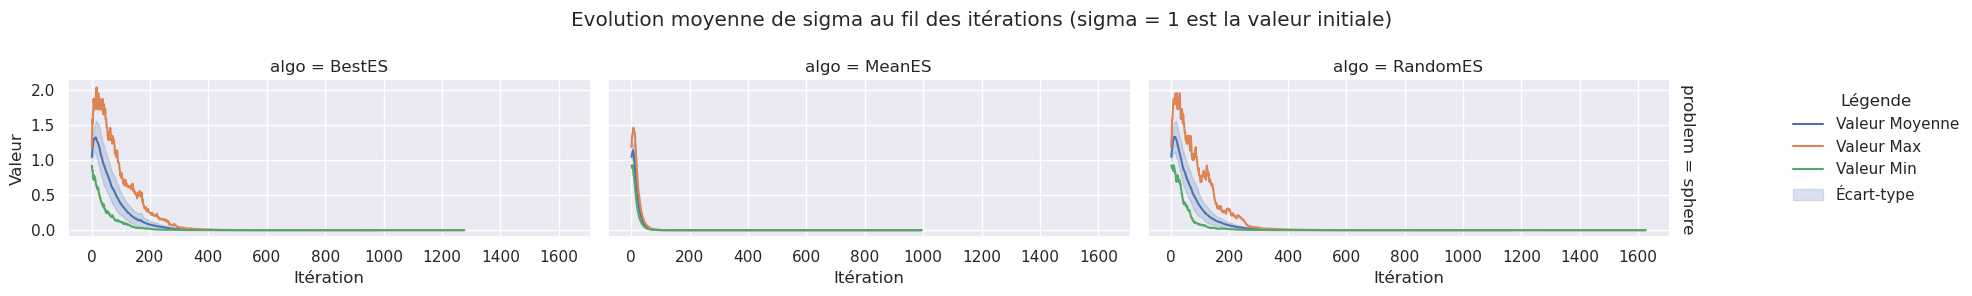

In [39]:
%matplotlib inline
g1 = draw_iterations_value_stats(valeurs_val, row='problem', col='algo', sharex='row', sharey='row', title='Evolution moyenne de la valeur au fil des itérations')
g2 = draw_iterations_value_stats(valeurs_sigma, row='problem', col='algo', sharex='row', sharey='row', title='Evolution moyenne de sigma au fil des itérations (sigma = 1 est la valeur initiale)')

On remarque que sigma à une évolution croissance, stagnation, déclin. Cela pourrais s'expliquer par le fait qu'au début de l'algorithme, il est trés facile de trouver des individus plus performants que les précédents, donc sigma augmente. Puis, au fur et à mesure des itérations et de l'exploration de l'espace de recherche, il devient de plus en plus difficile de trouver des individus plus performants, donc sigma stagne. Enfin, sigma diminue car l'algorithme se rapproche de la convergence et il est plus difficile de trouver des individus plus performants.

# 5. Prendre en compte son chemin

## MuCommaLambdaES

In [40]:
class MuComaLambdaES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._weights = np.array([[1/self._mu] for _ in range(self._mu)])
        self._mu_w = 1/np.sum(self._weights[:self._mu]**2)
        self._P_sigma = np.zeros(self._solution.dim)
        self._c_sigma = 4/math.sqrt(self._solution.dim)

    def update_m(self, sample):
        selection = np.array([ind._sol for ind in sample[:self._mu]])
        weighted_sum = np.sum(self._weights[:len(selection)] * selection, axis=0)
        moyenne = RealSolution(x=weighted_sum)
        self._problem.evaluate(moyenne)
        
        if self.better(moyenne, self._solution) :
            self._solution = moyenne

    def sample_solutions(self):
        sample = []
        z_list = []
        
        # Génération des solutions candidates
        for i in range(self._lambda):
            z = np.random.normal(size=self._solution.dim)
            z_list.append(z)
            x = RealSolution(x=(z * self._sigma + self._solution.solution))
            sample.append(x)
        
        # Évaluation des solutions
        eval_solutions(sample, self._problem)
        
        # Tri des solutions
        self._idx = sort_pop(sample, self._problem)
        
        # Réorganisation des vecteurs z selon l'ordre des solutions triées
        z_ordered = [z_list[self._idx[i]] for i in range(self._lambda)]
        
        # Calcul de z_w
        z_w = np.array(z_ordered[:self._mu])
        z_w = np.sum(self._weights[:self._mu] * z_w, axis=0)
        
        # Mise à jour de P_sigma
        self._P_sigma = (1 - self._c_sigma) * self._P_sigma + math.sqrt(1 - (1 - self._c_sigma)**2) * math.sqrt(self._mu_w) * z_w
        
        return sample

    def update_sigma(self, sample):
        norm_P_sigma = np.linalg.norm(self._P_sigma)
        esperance_Norm_N = math.sqrt(self._solution.dim) * (1 - 1/(4 * self._solution.dim) + 1/(21 * (self._solution.dim)**2))
        self._sigma = self._sigma * math.exp(self._c_sigma * (norm_P_sigma/esperance_Norm_N) - 1)

## Test MuCommaLambdaES

### Petites instances

In [41]:
max_evaluations = 10000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    MuComaLambdaES,
    RandomES,
    BestES,
    MeanES
]
sig_values = []
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 1.
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

In [43]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES'], stats['MuComaLambdaES']])
data = data.loc[data['problem_size'] == 'small'].copy()
valeurs_sigma = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='sig')
valeurs_val = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='val')

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
/opt/conda/lib/python3.11/site-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout

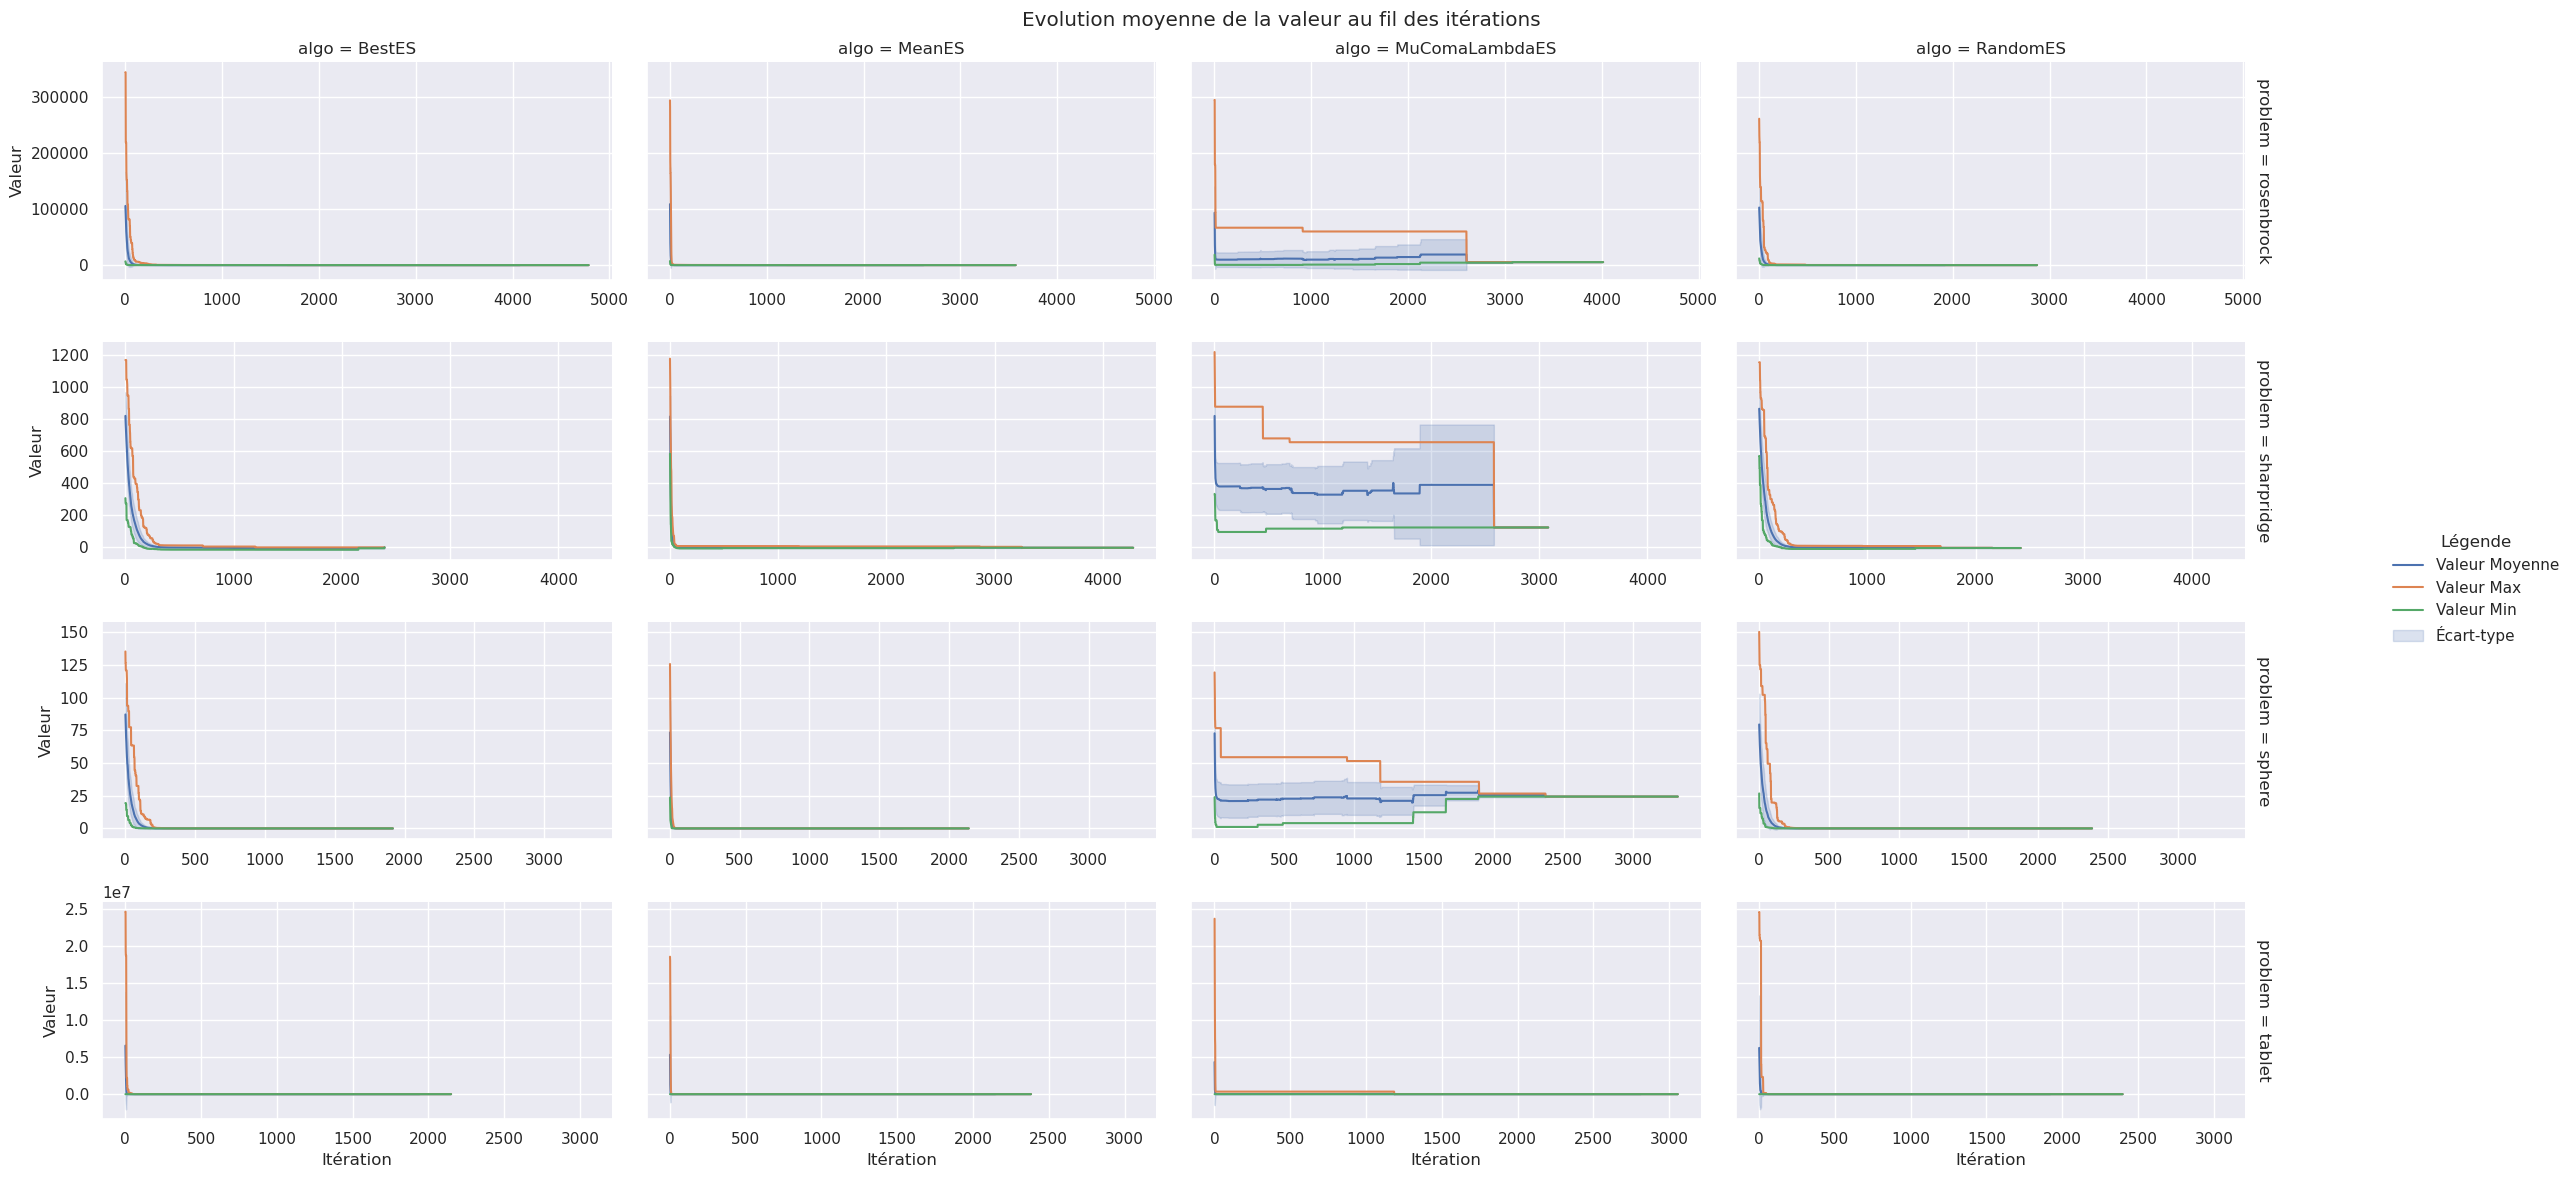

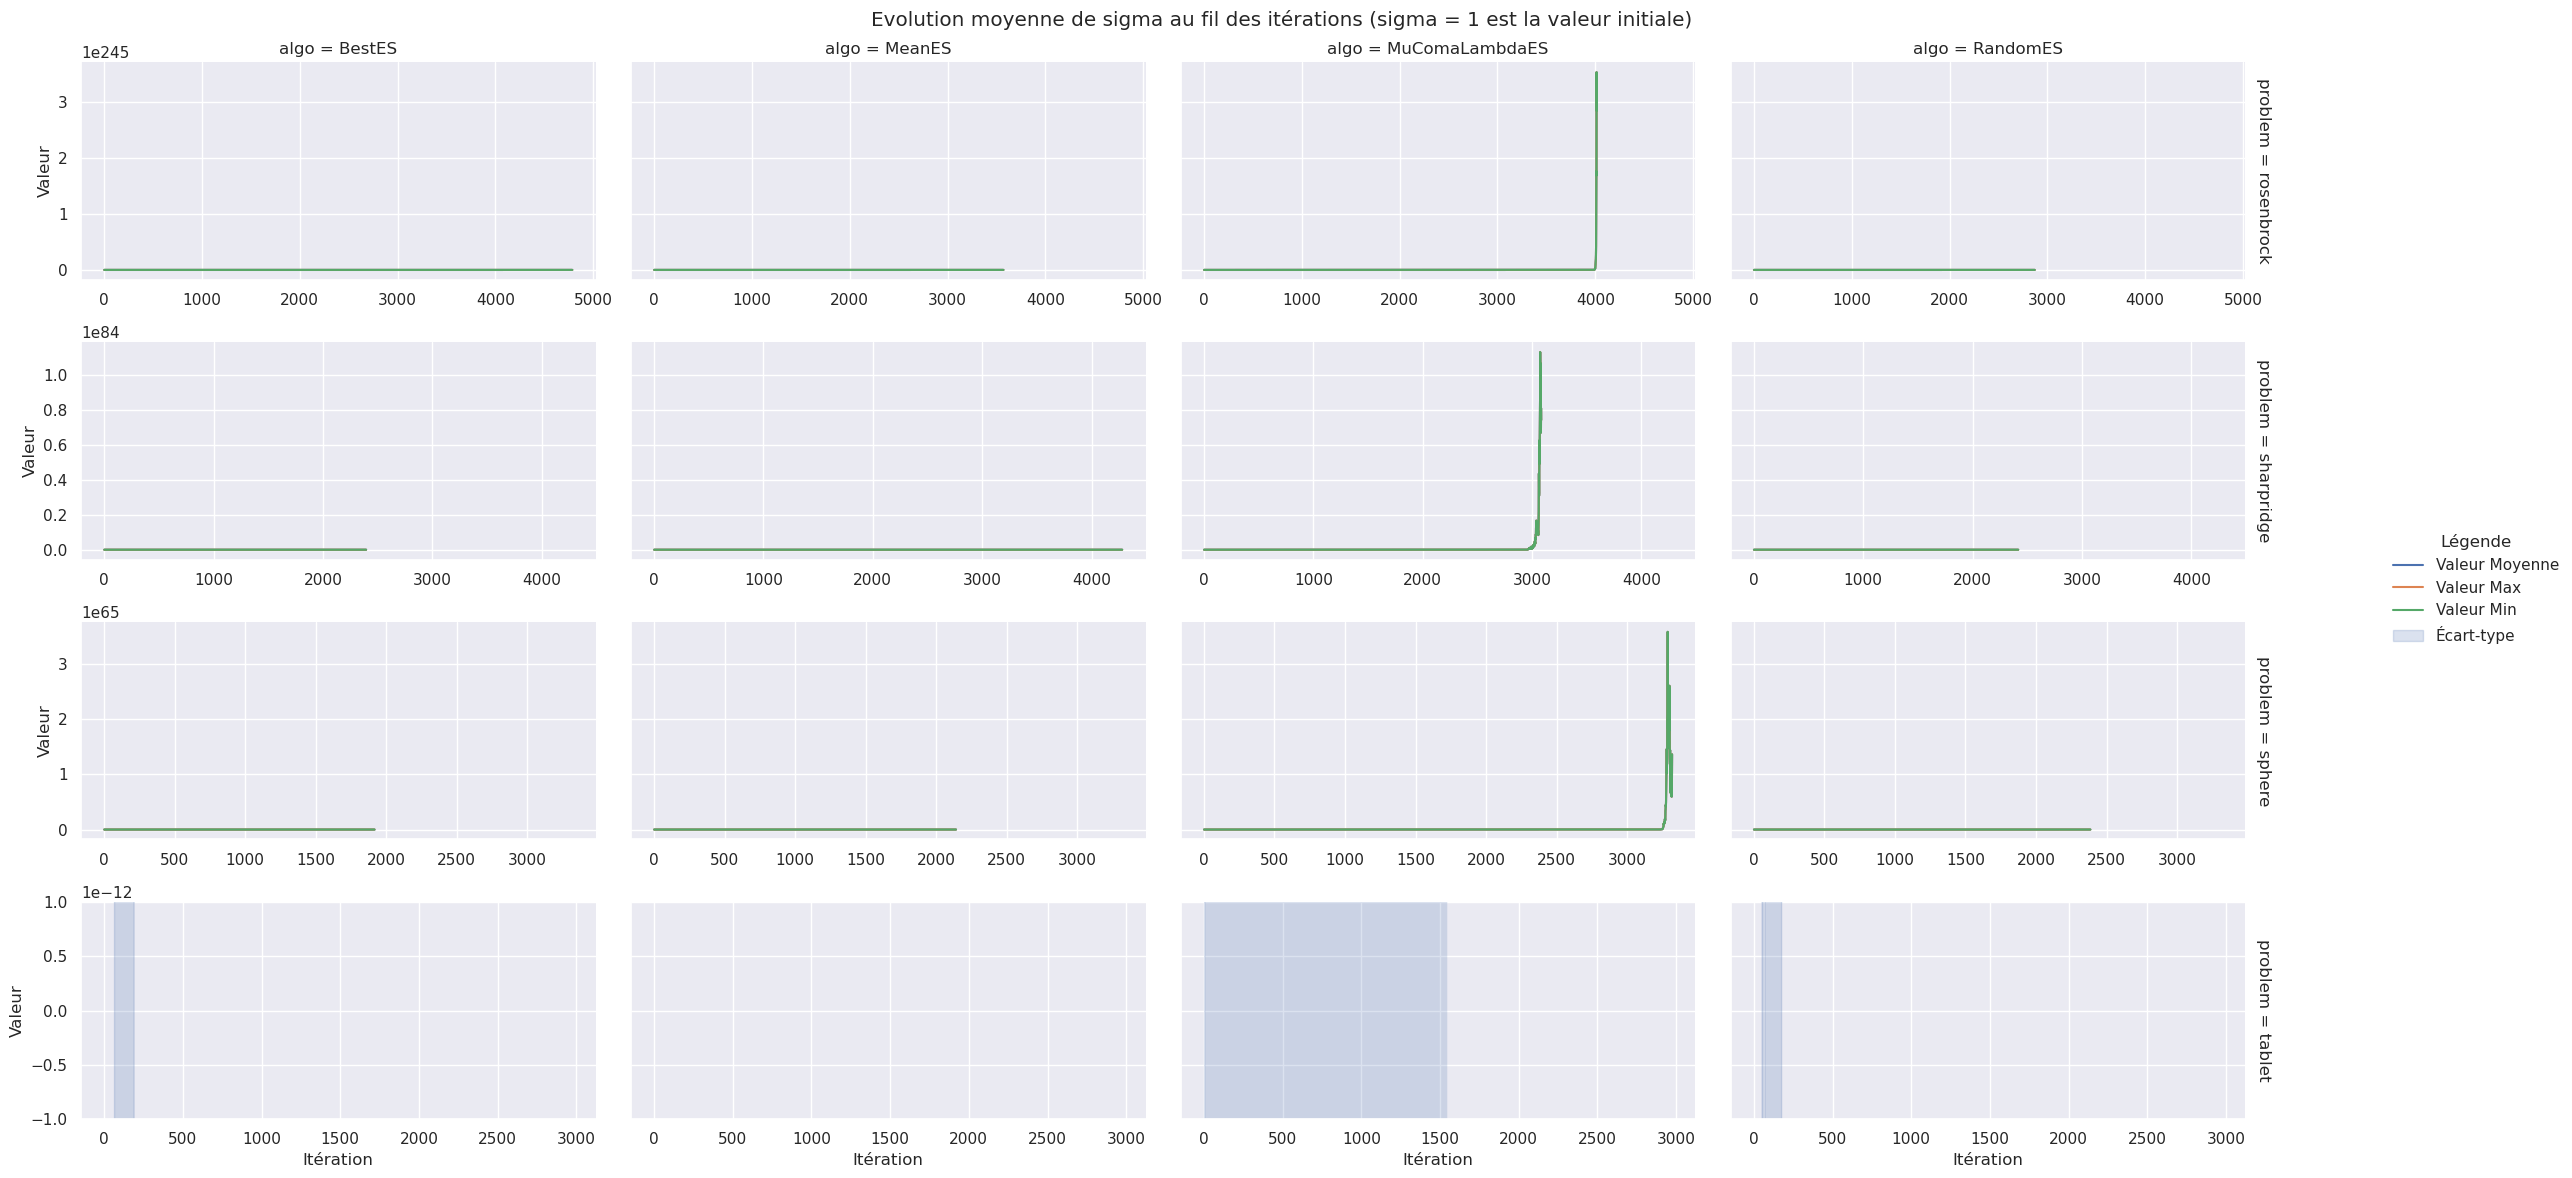

In [44]:

%matplotlib inline
g1 = draw_iterations_value_stats(valeurs_val, row='problem', col='algo', sharex='row', sharey='row', title='Evolution moyenne de la valeur au fil des itérations')
g2 = draw_iterations_value_stats(valeurs_sigma, row='problem', col='algo', title='Evolution moyenne de sigma au fil des itérations (sigma = 1 est la valeur initiale)')

### Grandes instances

In [45]:
max_evaluations = 10000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    MuComaLambdaES,
    RandomES,
    BestES,
    MeanES
]
sig_values = []
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 1.
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='large',
    nb_exec=1,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name,
    save=False
)

In [47]:
# stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small', 'large'])
# stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small', 'large'])
# stats['MeanES'] = get_stats_from_csv('MeanES', problems_name, problems_size=['small', 'large'])
# stats['MuComaLambdaES'] = get_stats_from_csv('MuComaLambdaES', problems_name, problems_size=['small', 'large'])

In [48]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES'], stats['MuComaLambdaES']])
data = data.loc[data['problem_size'] == 'large'].copy()
valeurs_sigma = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='sig')
valeurs_val = data_preprocessing(data, groupby=['algo', 'problem', 'problem_size', 'iter'], value='val')

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


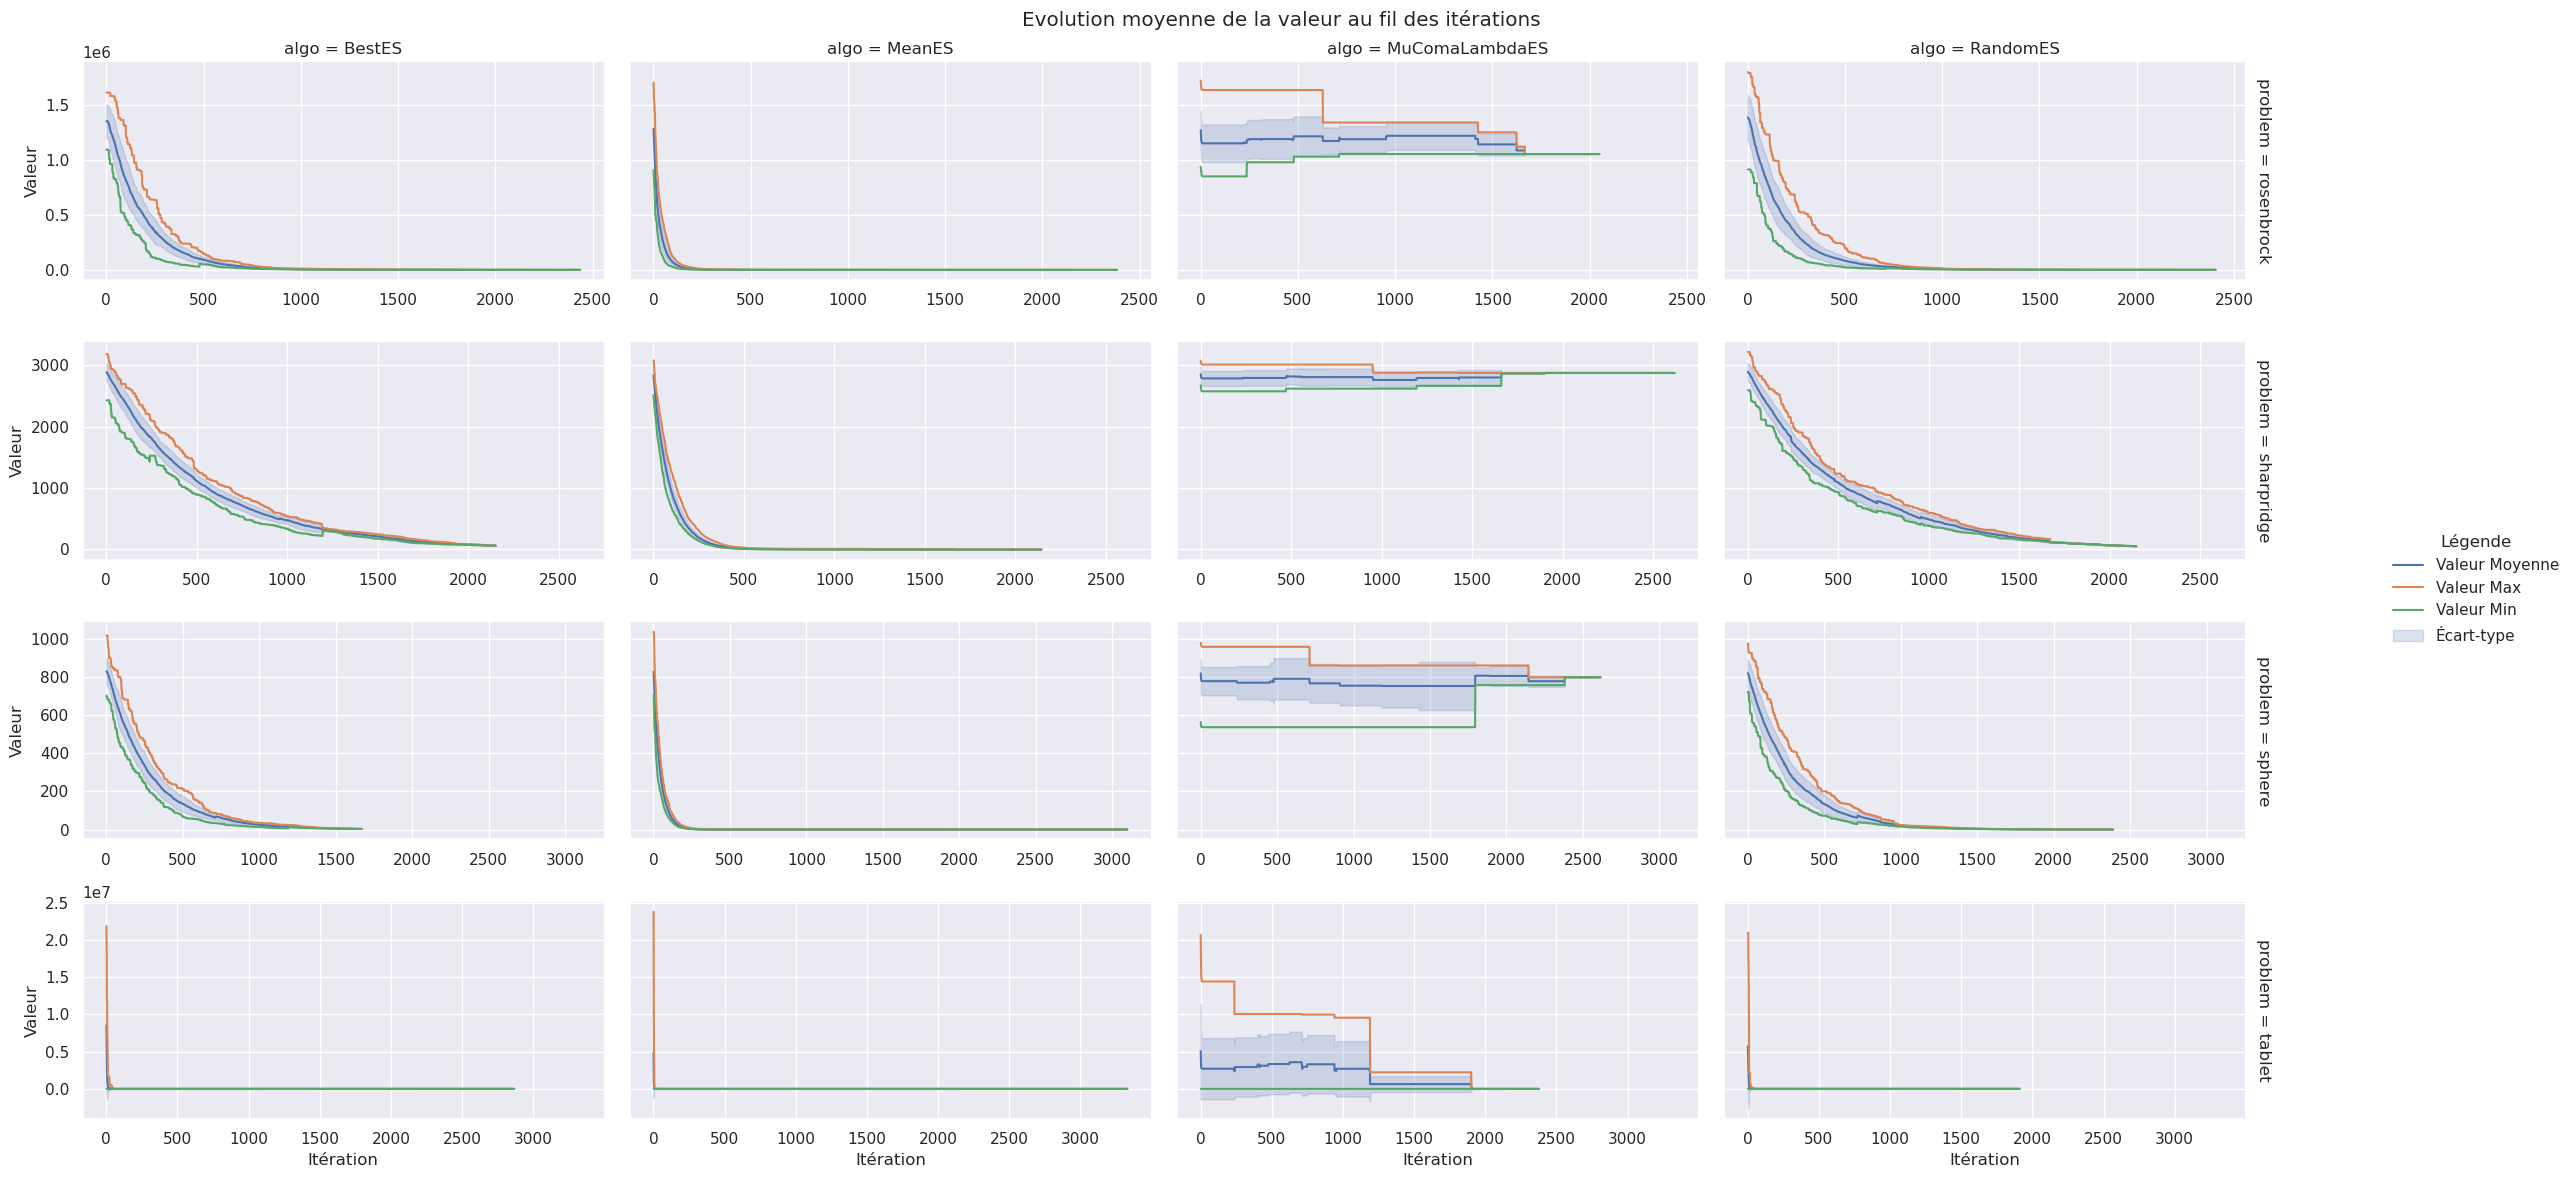

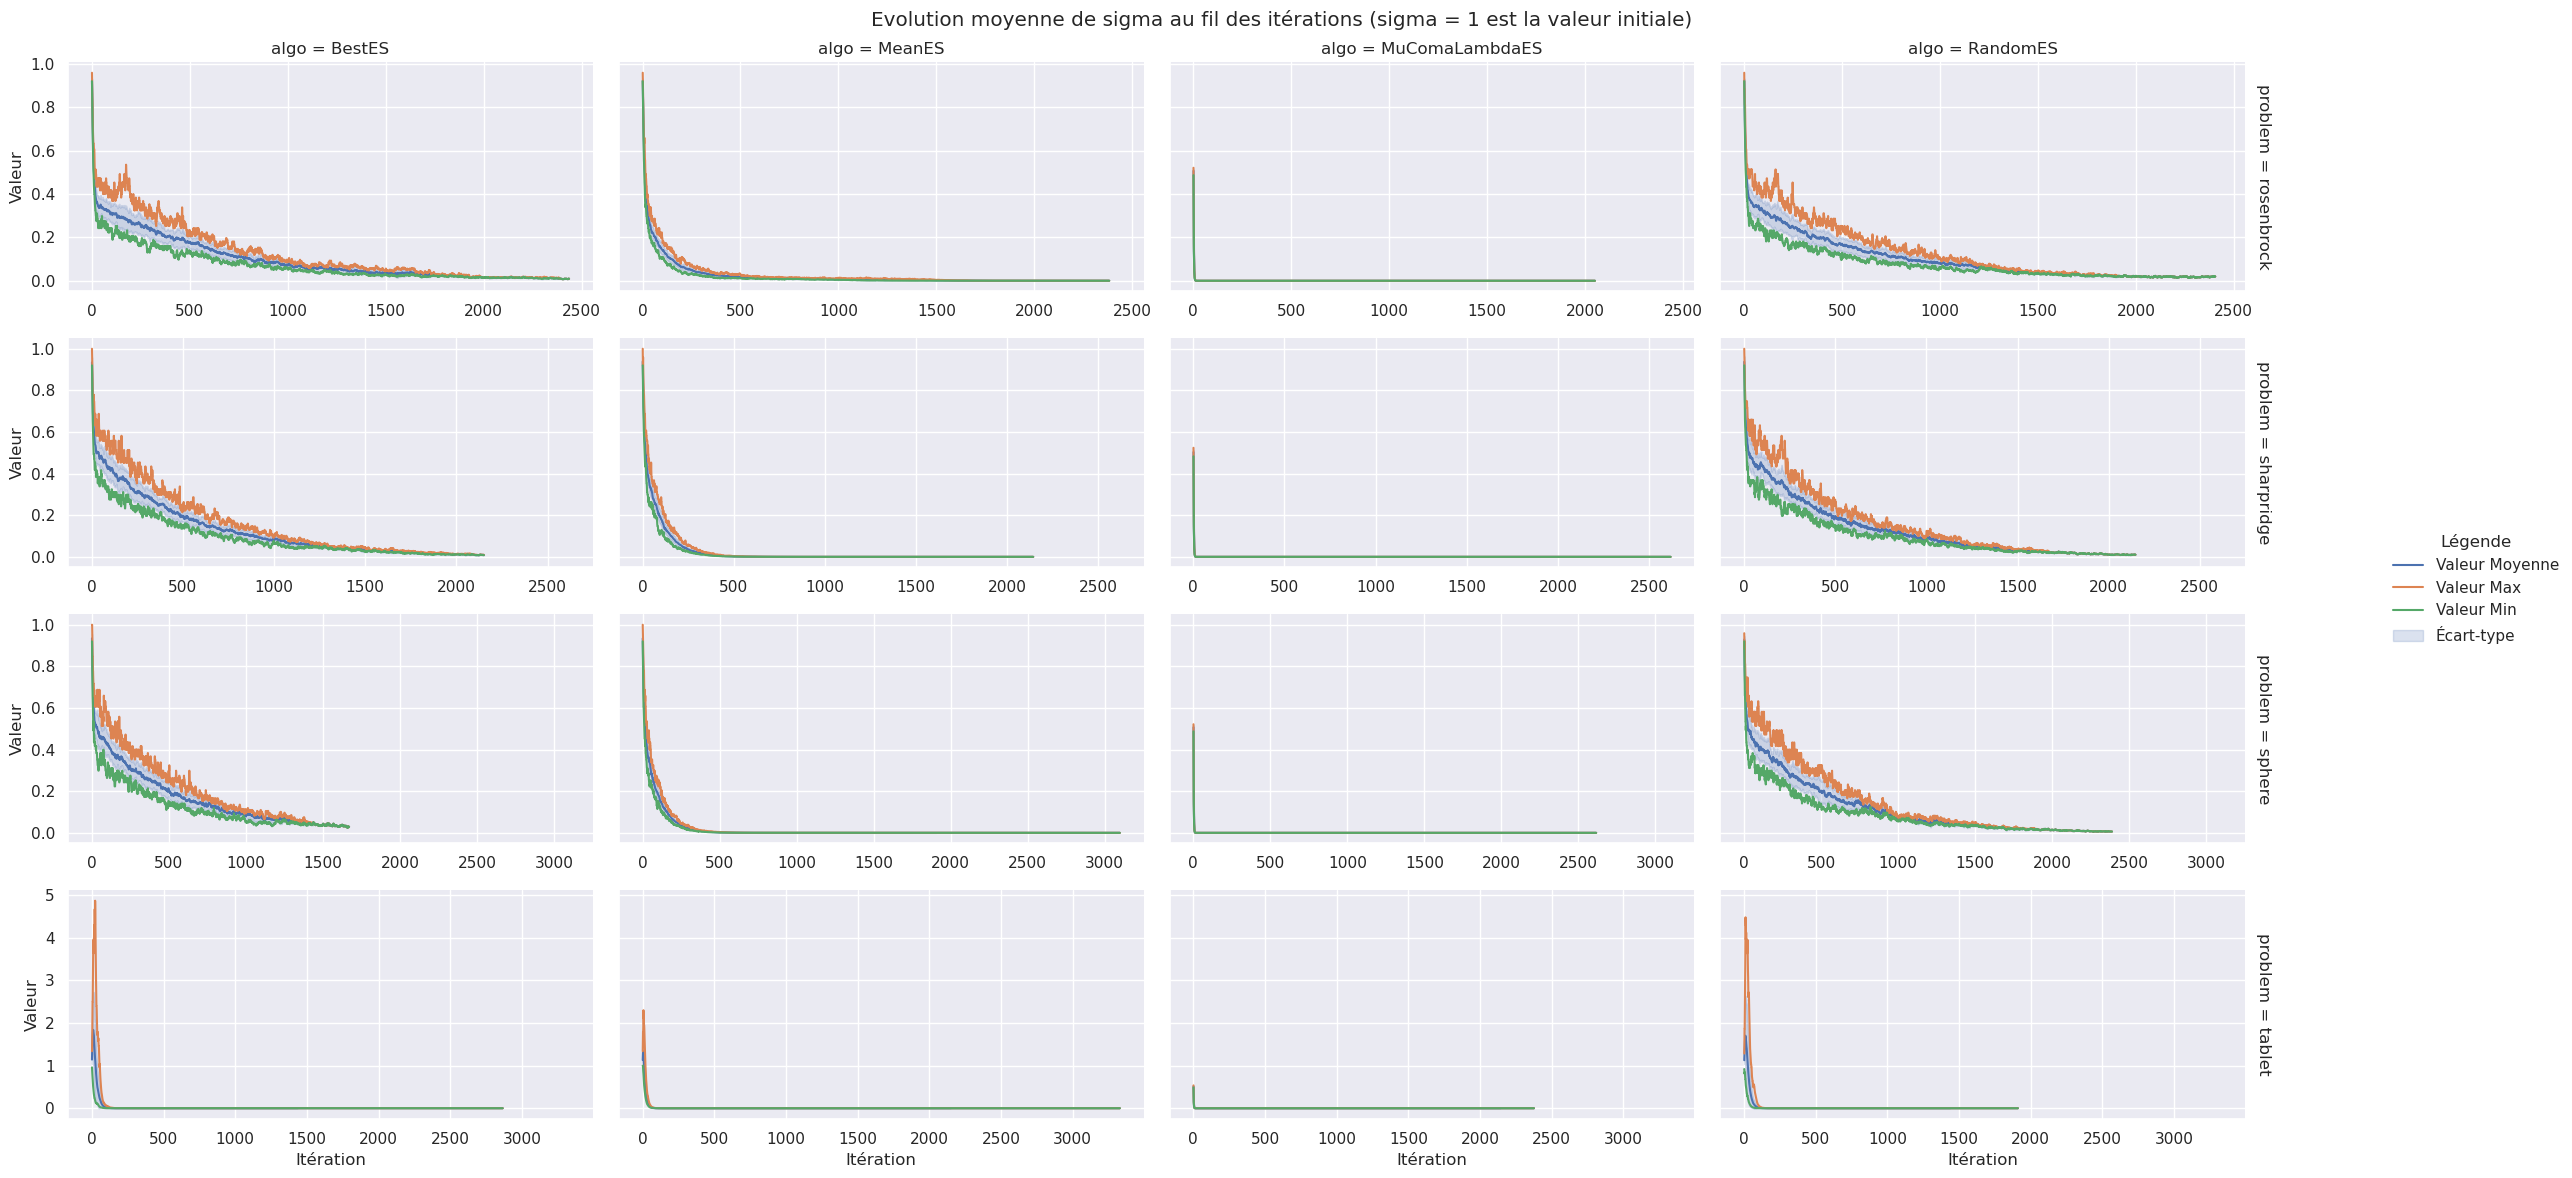

In [49]:
# %matplotlib inline
g1 = draw_iterations_value_stats(valeurs_val, row='problem', col='algo', sharex='row', sharey='row', title='Evolution moyenne de la valeur au fil des itérations')
g2 = draw_iterations_value_stats(valeurs_sigma, row='problem', col='algo', sharex='row', sharey='row', title='Evolution moyenne de sigma au fil des itérations (sigma = 1 est la valeur initiale)')